
<center> <h2>CA-HepTh dataset</h2> </center><br>

[Source : sparse.tamu.edu/SNAP/ca-HepTh](https://sparse.tamu.edu/SNAP/ca-HepTh)

Description : Arxiv HEP-TH (High Energy Physics - Theory) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to High Energy Physics - Theory category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.                                                        
                                                                               
The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its HEP-TH section.



In [1]:
import networkx as nx
import numpy as np
from scipy.sparse.linalg import eigs
from scipy.sparse import diags, eye
from random import randint
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
from utils import degree_distribution, spectral_clustering, modularity

In [3]:
path = "./datasets/CA-HepTh.txt"
graph = nx.readwrite.edgelist.read_edgelist(path, delimiter='\t')
n_nodes = graph.number_of_nodes()
n_edges = graph.number_of_edges()
print(f"The number of nodes = {n_nodes}")
print(f"The number of edges = {n_edges}")
connected_components = nx.connected_components(graph)
sorted_components = [c for c in sorted(connected_components, key=len)]
print(f"Number of connected components = {len(sorted_components)}")

The number of nodes = 9877
The number of edges = 25998
Number of connected components = 429


In [4]:
largest_cc = sorted_components[-1] # last element of the sorted list (increasing order)
largest_subgraph = graph.subgraph(largest_cc)
n_nodes_largest_cc = largest_subgraph.number_of_nodes()
n_edges_largest_cc = largest_subgraph.number_of_edges()
print(f"Number of nodes of largest connected component = {n_nodes_largest_cc}")
print(f"Number of edges of largest connected component = {n_edges_largest_cc}")

Number of nodes of largest connected component = 8638
Number of edges of largest connected component = 24827


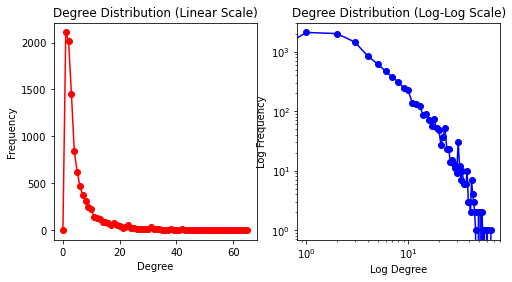

In [5]:
h = degree_distribution(graph,aff=True)

In [7]:
graph = nx.readwrite.edgelist.read_edgelist(path, delimiter='\t')
connected_components = nx.connected_components(graph)
sorted_components = [c for c in sorted(connected_components, key=len)]
largest_cc = sorted_components[-1]
largest_subgraph = graph.subgraph(largest_cc)
clustering = spectral_clustering(G=largest_subgraph, k=50)
#print(f"Clusters: {clustering}")
counter = Counter(clustering.values())
print(f"Number of nodes per cluster: {counter}")
print(f"Modularity for the largest_subgraph: {modularity(largest_subgraph, clustering)}")

Number of nodes per cluster: Counter({1: 7676, 18: 75, 49: 74, 48: 59, 46: 51, 32: 48, 29: 32, 37: 32, 16: 28, 42: 28, 35: 27, 17: 27, 47: 26, 45: 26, 44: 25, 6: 24, 43: 22, 38: 21, 41: 21, 7: 19, 22: 18, 13: 17, 5: 15, 33: 15, 0: 15, 21: 15, 36: 13, 39: 12, 14: 11, 12: 11, 15: 10, 34: 10, 40: 9, 8: 9, 2: 9, 27: 9, 20: 9, 3: 8, 28: 8, 23: 8, 24: 8, 30: 8, 9: 8, 26: 7, 25: 7, 19: 6, 4: 6, 31: 6, 11: 5, 10: 5})
Modularity for the largest_subgraph: 0.171181252074806
